# *Project - Stock Portfolio Optimization*

### Course : Financial Analytics
### Group : 3

In [171]:
import numpy as np
import pandas as pd
import datetime as dt
from pandas_datareader import data as wb
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sn
import yfinance as yf
%matplotlib inline

### Importing Data

In [172]:
stocks = input().split()
asset = [stock.upper() + '.NS' for stock in stocks]
asset

#Example: SBIN  ONGC WIPRO HEROMOTOCO LT ITC COALINDIA RELIANCE NCC

 SBIN  ONGC WIPRO HEROMOTOCO LT ITC COALINDIA RELIANCE NCC  


['SBIN.NS',
 'ONGC.NS',
 'WIPRO.NS',
 'HEROMOTOCO.NS',
 'LT.NS',
 'ITC.NS',
 'COALINDIA.NS',
 'RELIANCE.NS',
 'NCC.NS']

In [173]:
asset.sort()

In [174]:
years = float(input('No. of year data you want to analyze: '))

## Example: 3 or 5 or 8 or 10

No. of year data you want to analyze: 5


In [175]:
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days= 365 * years)
startDate

datetime.datetime(2019, 6, 23, 17, 58, 13, 235221)

In [176]:
yf.pdr_override()

In [177]:
pf_data = wb.get_data_yahoo(asset, start=startDate, end=endDate)['Adj Close']

[*********************100%%**********************]  9 of 9 completed


In [178]:
pf_data

Ticker,COALINDIA.NS,HEROMOTOCO.NS,ITC.NS,LT.NS,NCC.NS,ONGC.NS,RELIANCE.NS,SBIN.NS,WIPRO.NS
Date,,,,,,,,,
2019-06-24,160.872330,2267.876953,225.953049,1410.212158,92.743858,122.073891,1131.047607,332.447540,278.060730
2019-06-25,161.874863,2266.473877,227.793396,1404.721558,91.913727,122.812820,1161.017212,335.600647,279.431915
2019-06-26,163.096649,2256.784424,226.893661,1419.546509,92.144310,123.810417,1159.494263,337.106659,280.264435
2019-06-27,162.532745,2278.530762,223.703735,1419.272095,93.942924,126.064217,1141.575195,340.871643,276.297791
2019-06-28,159.023941,2263.711914,223.990051,1421.376831,89.884521,123.958199,1122.715454,340.024506,274.730652
...,...,...,...,...,...,...,...,...,...
2024-06-14,486.950012,5804.200195,431.149994,3659.036865,328.600006,275.399994,2955.100098,839.200012,477.500000
2024-06-18,489.049988,5754.850098,428.750000,3660.425781,322.450012,275.799988,2962.050049,844.900024,491.850006
2024-06-19,477.950012,5647.700195,423.649994,3561.949951,315.149994,271.549988,2917.300049,852.599976,495.750000


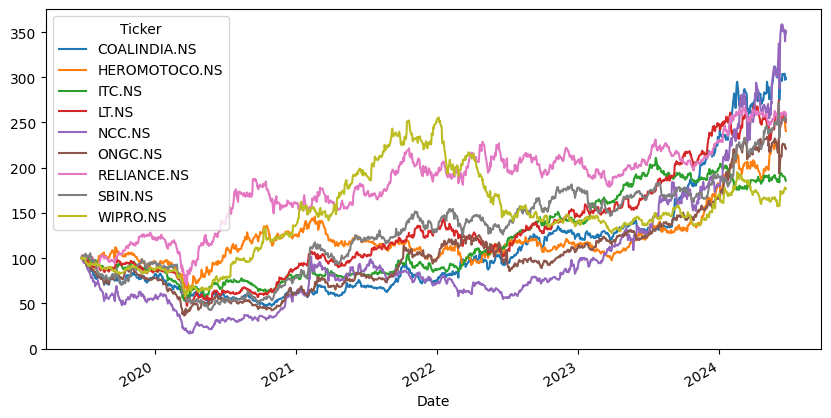

In [179]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize= (10,5))
plt.show()

# ***Prediction With LSTM:***

In [180]:
# Importing Required Library

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [181]:
## Scaling the data set as required

def Scale_data_set(data):

  dataset = data.values
  # Get the number of rows to train the model on
  training_data_len = int(np.ceil( len(dataset) * .95 ))

  scaler = MinMaxScaler(feature_range=(0,1))
  scaled_data = scaler.fit_transform(dataset)
  return training_data_len, scaled_data, dataset, scaler

In [182]:
## Creating a dataSet to be trained by LSTM

def Creating_training_data(training_data_len, scaled_data):
  # Create the training data set
  # Create the scaled training data set
  train_data = scaled_data[0:int(training_data_len), :]
  # Split the data into x_train and y_train data sets
  x_train = []
  y_train = []

  for i in range(60, len(train_data)):
      x_train.append(train_data[i-60:i, 0])
      y_train.append(train_data[i, 0])


  # Convert the x_train and y_train to numpy arrays
  x_train, y_train = np.array(x_train), np.array(y_train)

  # Reshape the data
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
  # x_train.shape

  return x_train, y_train

In [183]:
## Training by  LSTM

def LSTM_model(x_train, y_train):

  # Build the LSTM model
  model = Sequential()
  model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
  model.add(LSTM(64, return_sequences=False))
  model.add(Dense(25))
  model.add(Dense(1))

  # Compile the model
  model.compile(optimizer='adam', loss='mean_squared_error')

  # Train the model
  model.fit(x_train, y_train, batch_size=1, epochs=1)

  return model

In [184]:
## Predicting data using the trained value

def miscellaneous(model, training_data_len, scaled_data, dataset, scaler):
  # Create the testing data set
  # Create a new array containing scaled values from index 1543 to 2002
  test_data = scaled_data[training_data_len - 60: , :]
  # Create the data sets x_test and y_test
  x_test = []
  y_test = dataset[training_data_len:, :]
  for i in range(60, len(test_data)):
      x_test.append(test_data[i-60:i, 0])

  # Convert the data to a numpy array
  x_test = np.array(x_test)

  # Reshape the data
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

  # Get the models predicted price values
  predictions = model.predict(x_test)
  predictions = scaler.inverse_transform(predictions)

  # Get the root mean squared error (RMSE)
  rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

  return predictions, rmse

In [185]:
## Ploting the chart with predicted values

def Ploting_Prediction(predictions ,training_data_len, data, title):
  # Plot the data
  train = data[:training_data_len]
  valid = data[training_data_len:]
  valid['Predictions'] = predictions
  # Visualize the data
  plt.figure(figsize=(16,6))
  plt.title(title)
  plt.xlabel('Date', fontsize=18)
  plt.ylabel('Close Price in Rs', fontsize=18)
  plt.plot(train['Close'])
  plt.plot(valid[['Close', 'Predictions']])
  plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
  plt.show()

  return train, valid

def plot_graph_plotly(predictions ,training_data_len, data, title):
  # Plot the data
  train = data[:training_data_len]
  valid = data[training_data_len:]
  valid['Predictions'] = predictions

  #Max Sharpe Ratio
  train_data = go.Scatter(
      name='Training data',

      x=data.index,
      y=train['Close'],
      marker=dict(color='blue',size=5,)
  )

  #Min Vol
  Val_data = go.Scatter(
      name='Actual Value',

      x=valid.index,
      y=valid['Close'],
      marker=dict(color='green',size=5,)
  )

  #Random portfolio
  Prediction_data = go.Scatter(
      name='Predicted Data',

      x=valid.index,
      y=valid['Predictions'],
      marker=dict(color='red',size=5,)
  )

  data = [train_data, Val_data, Prediction_data]

  layout = go.Layout(
      title = title,
      yaxis = dict(title='Close Price in Rs'),
      xaxis = dict(title='Date'),
      showlegend = True,
      legend = dict(
          x = .83, y = 0, traceorder='normal',
          bgcolor='#E2E2E2',
          bordercolor='black',
          borderwidth=2),
      width=980,
      height=500)

  fig = go.Figure(data=data, layout=layout)
  fig.show()

  return train, valid

In [186]:
##  Compiling all functions to one functions

def Stock_prediction(data, title):
  training_data_len, scaled_data, dataset, scaler = Scale_data_set(data)
  x_train, y_train = Creating_training_data(training_data_len, scaled_data)
  model = LSTM_model(x_train, y_train)
  predictions, rmse = miscellaneous(model, training_data_len, scaled_data, dataset, scaler)
  train, valid = plot_graph_plotly(predictions ,training_data_len, data, title)

  return train, valid, rmse, predictions

## Sending Data for Prediction:

In [187]:
data = {}
for st in asset:
  data['{}'.format(st)] = pf_data.filter([st])

In [188]:
pf_data

Ticker,COALINDIA.NS,HEROMOTOCO.NS,ITC.NS,LT.NS,NCC.NS,ONGC.NS,RELIANCE.NS,SBIN.NS,WIPRO.NS
Date,,,,,,,,,
2019-06-24,160.872330,2267.876953,225.953049,1410.212158,92.743858,122.073891,1131.047607,332.447540,278.060730
2019-06-25,161.874863,2266.473877,227.793396,1404.721558,91.913727,122.812820,1161.017212,335.600647,279.431915
2019-06-26,163.096649,2256.784424,226.893661,1419.546509,92.144310,123.810417,1159.494263,337.106659,280.264435
2019-06-27,162.532745,2278.530762,223.703735,1419.272095,93.942924,126.064217,1141.575195,340.871643,276.297791
2019-06-28,159.023941,2263.711914,223.990051,1421.376831,89.884521,123.958199,1122.715454,340.024506,274.730652
...,...,...,...,...,...,...,...,...,...
2024-06-14,486.950012,5804.200195,431.149994,3659.036865,328.600006,275.399994,2955.100098,839.200012,477.500000
2024-06-18,489.049988,5754.850098,428.750000,3660.425781,322.450012,275.799988,2962.050049,844.900024,491.850006
2024-06-19,477.950012,5647.700195,423.649994,3561.949951,315.149994,271.549988,2917.300049,852.599976,495.750000


In [189]:
for i in asset:
  DATA = data[i]
  DATA = DATA.rename(columns = {i:"Close"})
  train, valid, rmse, predictions = Stock_prediction(DATA, i)
  print("'root mean squared error' of {} = ".format(i) + str(rmse))


2/2 [==============================] - 1s 8ms/step


<ipython-input-185-a4731d6158e1>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



'root mean squared error' of COALINDIA.NS = 13.56276841602882
2/2 [==============================] - 1s 7ms/step


<ipython-input-185-a4731d6158e1>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



'root mean squared error' of HEROMOTOCO.NS = 214.14918794805385
2/2 [==============================] - 1s 8ms/step


<ipython-input-185-a4731d6158e1>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



'root mean squared error' of ITC.NS = 7.184124178298282
2/2 [==============================] - 1s 7ms/step


<ipython-input-185-a4731d6158e1>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



'root mean squared error' of LT.NS = 120.12493223921715
2/2 [==============================] - 1s 7ms/step


<ipython-input-185-a4731d6158e1>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



'root mean squared error' of NCC.NS = 15.845971209445601
2/2 [==============================] - 1s 16ms/step


<ipython-input-185-a4731d6158e1>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



'root mean squared error' of ONGC.NS = 10.233439114614526
2/2 [==============================] - 1s 7ms/step


<ipython-input-185-a4731d6158e1>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



'root mean squared error' of RELIANCE.NS = 73.11901826817927
2/2 [==============================] - 1s 8ms/step


<ipython-input-185-a4731d6158e1>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



'root mean squared error' of SBIN.NS = 44.033570985084886
2/2 [==============================] - 1s 9ms/step


<ipython-input-185-a4731d6158e1>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



'root mean squared error' of WIPRO.NS = 13.38267153627088


# Picking best performing stock

### Returns

In [190]:
retrn = (pf_data / pf_data.shift(1)) - 1
retrn

Ticker,COALINDIA.NS,HEROMOTOCO.NS,ITC.NS,LT.NS,NCC.NS,ONGC.NS,RELIANCE.NS,SBIN.NS,WIPRO.NS
Date,,,,,,,,,
2019-06-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-25,0.006232,-0.000619,0.008145,-0.003893,-0.008951,0.006053,0.026497,0.009485,0.004931
2019-06-26,0.007548,-0.004275,-0.003950,0.010554,0.002509,0.008123,-0.001312,0.004488,0.002979
2019-06-27,-0.003457,0.009636,-0.014059,-0.000193,0.019520,0.018204,-0.015454,0.011169,-0.014153
2019-06-28,-0.021588,-0.006504,0.001280,0.001483,-0.043201,-0.016706,-0.016521,-0.002485,-0.005672
...,...,...,...,...,...,...,...,...,...
2024-06-14,-0.001947,-0.002029,0.001975,-0.004279,0.008749,-0.004158,0.008395,-0.005569,-0.010568
2024-06-18,0.004313,-0.008502,-0.005566,0.000380,-0.018716,0.001452,0.002352,0.006792,0.030052
2024-06-19,-0.022697,-0.018619,-0.011895,-0.026903,-0.022639,-0.015410,-0.015108,0.009113,0.007929


In [191]:
annual_returns = retrn.mean() * 250 *100
annual_returns.values[::-1].sort()
annual_returns

Ticker
COALINDIA.NS     39.659929
HEROMOTOCO.NS    27.711373
ITC.NS           24.698005
LT.NS            23.696989
NCC.NS           23.528197
ONGC.NS          22.846341
RELIANCE.NS      22.552511
SBIN.NS          15.964491
WIPRO.NS         15.478327
dtype: float64

In [192]:
sorted_annual_return = annual_returns[0:5]
sorted_annual_return

Ticker
COALINDIA.NS     39.659929
HEROMOTOCO.NS    27.711373
ITC.NS           24.698005
LT.NS            23.696989
NCC.NS           23.528197
dtype: float64

In [193]:
assets = list(sorted_annual_return.index)
assets

['COALINDIA.NS', 'HEROMOTOCO.NS', 'ITC.NS', 'LT.NS', 'NCC.NS']

In [194]:
pf_data = pf_data.filter(assets)
pf_data

Ticker,COALINDIA.NS,HEROMOTOCO.NS,ITC.NS,LT.NS,NCC.NS
Date,,,,,
2019-06-24,160.872330,2267.876953,225.953049,1410.212158,92.743858
2019-06-25,161.874863,2266.473877,227.793396,1404.721558,91.913727
2019-06-26,163.096649,2256.784424,226.893661,1419.546509,92.144310
2019-06-27,162.532745,2278.530762,223.703735,1419.272095,93.942924
2019-06-28,159.023941,2263.711914,223.990051,1421.376831,89.884521
...,...,...,...,...,...
2024-06-14,486.950012,5804.200195,431.149994,3659.036865,328.600006
2024-06-18,489.049988,5754.850098,428.750000,3660.425781,322.450012
2024-06-19,477.950012,5647.700195,423.649994,3561.949951,315.149994


In [195]:
returns = retrn.filter(assets)
returns

Ticker,COALINDIA.NS,HEROMOTOCO.NS,ITC.NS,LT.NS,NCC.NS
Date,,,,,
2019-06-24,NaN,NaN,NaN,NaN,NaN
2019-06-25,0.006232,-0.000619,0.008145,-0.003893,-0.008951
2019-06-26,0.007548,-0.004275,-0.003950,0.010554,0.002509
2019-06-27,-0.003457,0.009636,-0.014059,-0.000193,0.019520
2019-06-28,-0.021588,-0.006504,0.001280,0.001483,-0.043201
...,...,...,...,...,...
2024-06-14,-0.001947,-0.002029,0.001975,-0.004279,0.008749
2024-06-18,0.004313,-0.008502,-0.005566,0.000380,-0.018716
2024-06-19,-0.022697,-0.018619,-0.011895,-0.026903,-0.022639


In [196]:
num_assets = len(assets)
num_assets

5

### Random Weights

In [197]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.21204369, 0.06501741, 0.18488243, 0.32434299, 0.21371348])

### Mean Annual Returns

In [198]:
np.sum(weights * returns.mean()) * 250

0.26179793402117413

### Annual Variance

In [199]:
np.dot(weights.T, np.dot(returns.cov() * 250, weights))

0.06508450017838893

### Annual Covariance

In [200]:
np.sqrt(np.dot(weights.T,np.dot(returns.cov() * 250, weights)))

0.2551166403400392

### Correlation

In [201]:
corr_matrix = returns.corr()
corr_matrix

Ticker,COALINDIA.NS,HEROMOTOCO.NS,ITC.NS,LT.NS,NCC.NS
Ticker,,,,,
COALINDIA.NS,1.000000,0.277276,0.308263,0.391404,0.409637
HEROMOTOCO.NS,0.277276,1.000000,0.279331,0.382574,0.315148
ITC.NS,0.308263,0.279331,1.000000,0.375615,0.336772
LT.NS,0.391404,0.382574,0.375615,1.000000,0.460020
NCC.NS,0.409637,0.315148,0.336772,0.460020,1.000000


## Markovitz Portfolio Theory

### 5000 Random weights

In [202]:
pfolio_returns = []
pfolio_volatilities = []
pfolio_weights = []

for x in range (5000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(returns.cov() * 250, weights))))
    pfolio_weights.append(weights)

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)
#pfolio_weights = pfolio_weights.tolist()

# pfolio_returns, pfolio_volatilities, pfolio_weights

In [203]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})


Portfolio Returns:  [0.28160136 0.23328871 0.26535149 0.28450274 0.27261981]
Portfolio Volatilities:  [0.28491732 0.21924647 0.25583573 0.29376935 0.27348597]
NaNs in Returns:  0
NaNs in Volatilities:  0


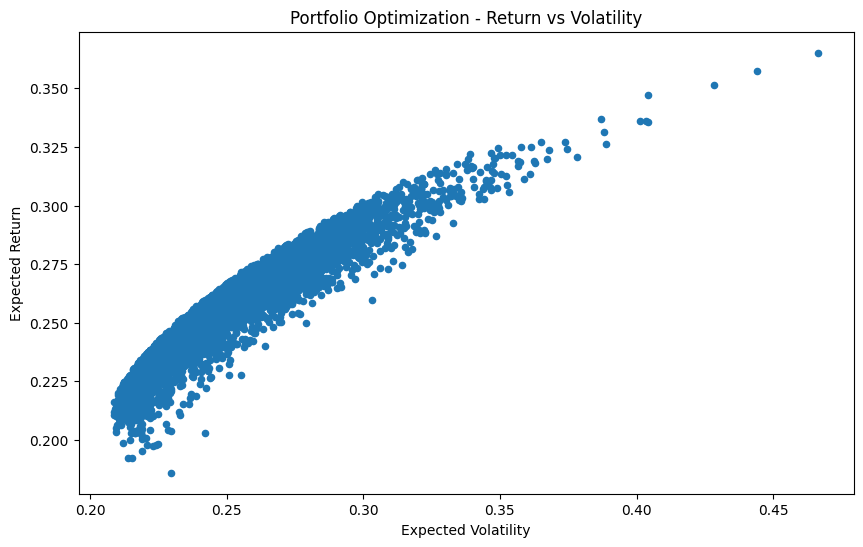

In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `returns` is already defined
num_assets = returns.shape[1]

pfolio_returns = []
pfolio_volatilities = []
pfolio_weights = []

for x in range(5000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 250, weights))))
    pfolio_weights.append(weights)

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

# Check if arrays are not empty and contain valid data
print("Portfolio Returns: ", pfolio_returns[:5])  # Print first 5 values
print("Portfolio Volatilities: ", pfolio_volatilities[:5])  # Print first 5 values

# Check if there are any NaN values
print("NaNs in Returns: ", np.isnan(pfolio_returns).sum())
print("NaNs in Volatilities: ", np.isnan(pfolio_volatilities).sum())

# Create a DataFrame and plot
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.title('Portfolio Optimization - Return vs Volatility')
plt.show()


In [205]:
max_return = max(pfolio_returns)
max_return


0.36520275643875694

In [206]:
max_rindex = np.where(pfolio_returns == max_return)
print(max_rindex)

(array([1552]),)


In [207]:
max_rvolatility = pfolio_volatilities[max_rindex[0][0]]
max_rvolatility

0.4665377299699989

In [208]:
max_rweights = pfolio_weights[max_rindex[0][0]]
max_rweights

array([0.01773872, 0.02549583, 0.04455546, 0.08539357, 0.82681642])

In [209]:
min_volatility = pfolio_volatilities.min()

min_volatility

0.20873816840117945

In [210]:
min_vindex = np.where(pfolio_volatilities == min_volatility)
min_vindex

(array([1774]),)

In [211]:
min_vreturns = pfolio_returns[min_vindex[0][0]]
min_vreturns

0.21623441090317058

In [212]:
min_vweights = pfolio_weights[min_vindex[0][0]]
min_vweights

array([0.20184185, 0.26179469, 0.32828714, 0.2002684 , 0.00780793])

In [213]:
max_sr = []
max_sr =  [str(round(max_return * 100,3) ) + '%', str(round(max_rvolatility * 100,3)) + '%']
for i in range(num_assets):
    max_sr.append(str(round(max_rweights[i] * 100,3)) + '%')
max_sr

['36.52%', '46.654%', '1.774%', '2.55%', '4.456%', '8.539%', '82.682%']

In [214]:
min_vol = []
min_vol =  [str(round(min_vreturns*100,3)) + '%', str(round(min_volatility * 100,3)) + '%']
for i in range(num_assets):
    min_vol.append(str(round(min_vweights[i] *100,3)) + '%')
min_vol

['21.623%', '20.874%', '20.184%', '26.179%', '32.829%', '20.027%', '0.781%']

In [215]:
#Max Sharpe Ratio
MaxSharpeRatio = go.Scatter(
    name='Maximium Return',
    mode='markers',
    x=[max_rvolatility],
    y=[max_return],
    marker=dict(color='red',size=14,line=dict(width=3, color='black'))
)

#Min Vol
MinVol = go.Scatter(
    name='Mininium Risk',
    mode='markers',
    x=[min_volatility],
    y=[min_vreturns],
    marker=dict(color='green',size=14,line=dict(width=3, color='black'))
)

#Random portfolio
EF_curve = go.Scatter(
    name='Random Portfolios',
    mode='markers',
    x= pfolio_volatilities,
    y= pfolio_returns,
    marker=dict(color='blue',size=5)
)

data = [MaxSharpeRatio, MinVol, EF_curve]

layout = go.Layout(
    title = 'Portfolio Optimisation with the MPT',
    yaxis = dict(title='Annualised Return'),
    xaxis = dict(title='Annualised Volatility'),
    showlegend = True,
    legend = dict(
        x = .75, y = 0, traceorder='normal',
        bgcolor='#E2E2E2',
        bordercolor='black',
        borderwidth=2),
    width=800,
    height=600)

fig = go.Figure(data=data, layout=layout)
fig.show()

### Max Sharpe ratio and Min volatility table with required weights of stocks

In [216]:
col = []
col =  ['Returns', 'Volatility']
for i in range(num_assets):
    col.append(pf_data.columns[i])

In [217]:
result_table = pd.DataFrame(columns  = [col], index=['maximum Return', 'minimun risk'])
result_table.iloc[0] = max_sr
result_table.iloc[1] = min_vol

In [218]:
result_table

,Returns,Volatility,COALINDIA.NS,HEROMOTOCO.NS,ITC.NS,LT.NS,NCC.NS
maximum Return,36.52%,46.654%,1.774%,2.55%,4.456%,8.539%,82.682%
minimun risk,21.623%,20.874%,20.184%,26.179%,32.829%,20.027%,0.781%


### Correlation Graph

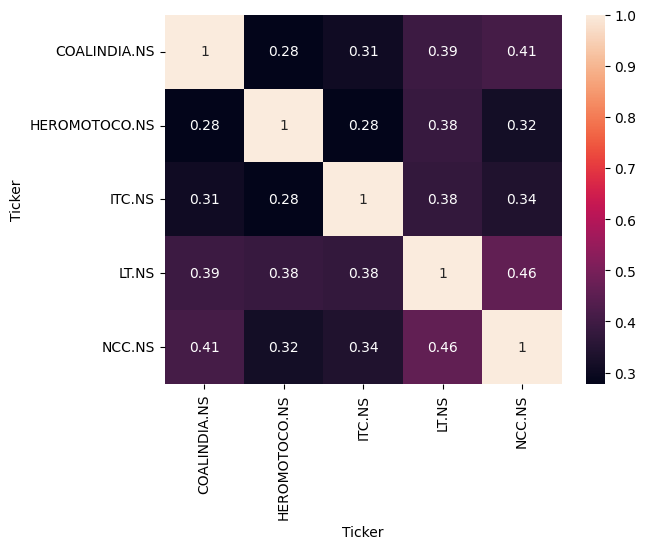

In [219]:
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [220]:
trace = go.Heatmap(
   x = assets,
   y = assets,
   z = corr_matrix,
   type = 'heatmap',
   colorscale = 'Viridis',
   hovertemplate = "%{z}"
)
layout = go.Layout(
    title = 'Correlation',
    yaxis = dict(title='Stocks'),
    xaxis = dict(title='Stocks'),
    showlegend = False,
    width=500,
    height=500)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()